# Wine Clustering

## Wyatt Rasmussen
## DSC 680

### Summary:  
For this project the goal is to take in the wines in the dataset and cluster them into groups that are similar based on the chemical makeup of the wine. This will require unsupervised learning as we do not have an answer within the data of the clusters that these wines should belong to. To do this project I will be using a clustering algorithm and adding that as a column in the data. Then the data will be import over to Tableau to do visualizations with the clusters.

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
wines = pd.read_csv('data/wine-clustering.csv')

**Understanding the Data**

In [3]:
shape = wines.shape

print('There are {} rows'.format(shape[0]))
print('There are {} columns'.format(shape[1]))

There are 178 rows
There are 13 columns


In [4]:
wines.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
wines.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [6]:
wines.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
columns = wines.columns

<Figure size 432x288 with 0 Axes>

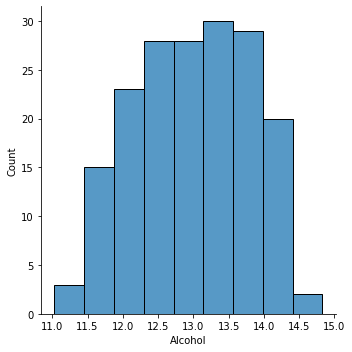

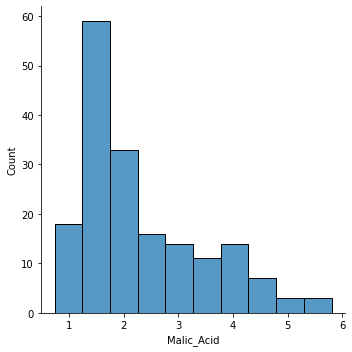

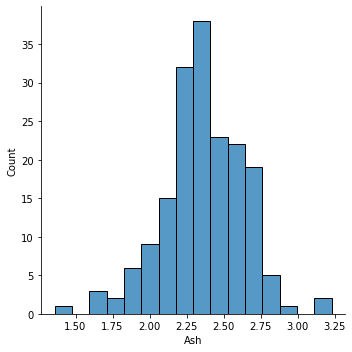

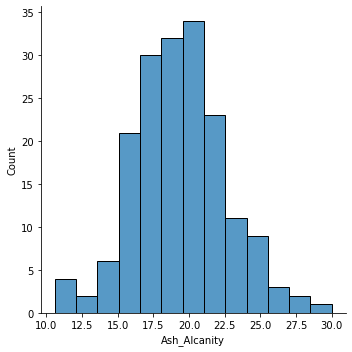

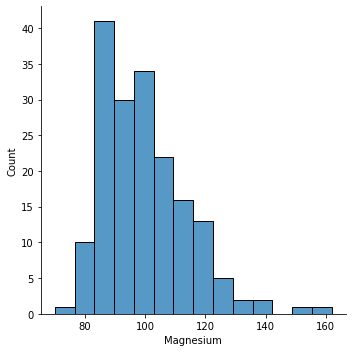

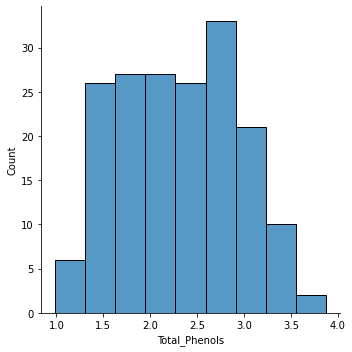

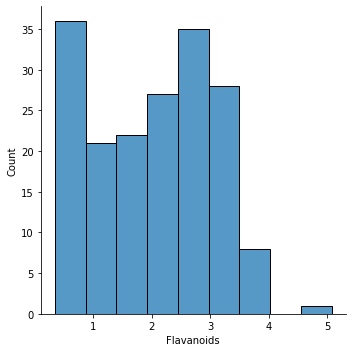

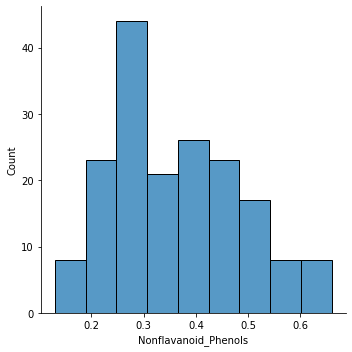

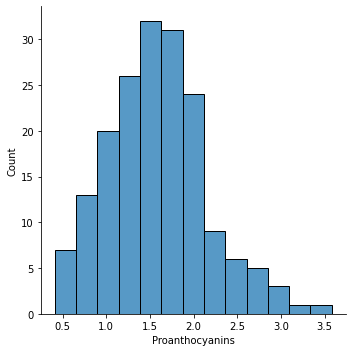

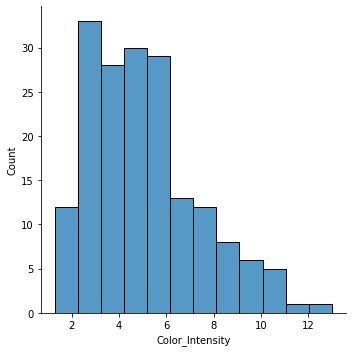

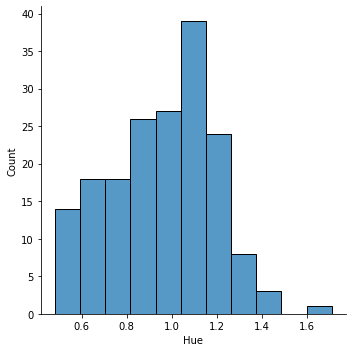

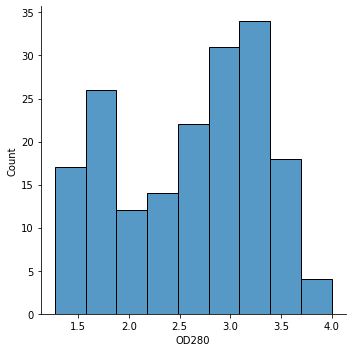

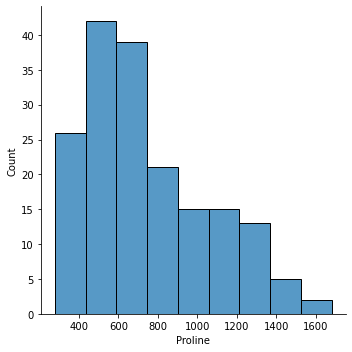

In [8]:
for i, col in enumerate(columns):
    plt.figure(i)
    sns.displot(wines[col])

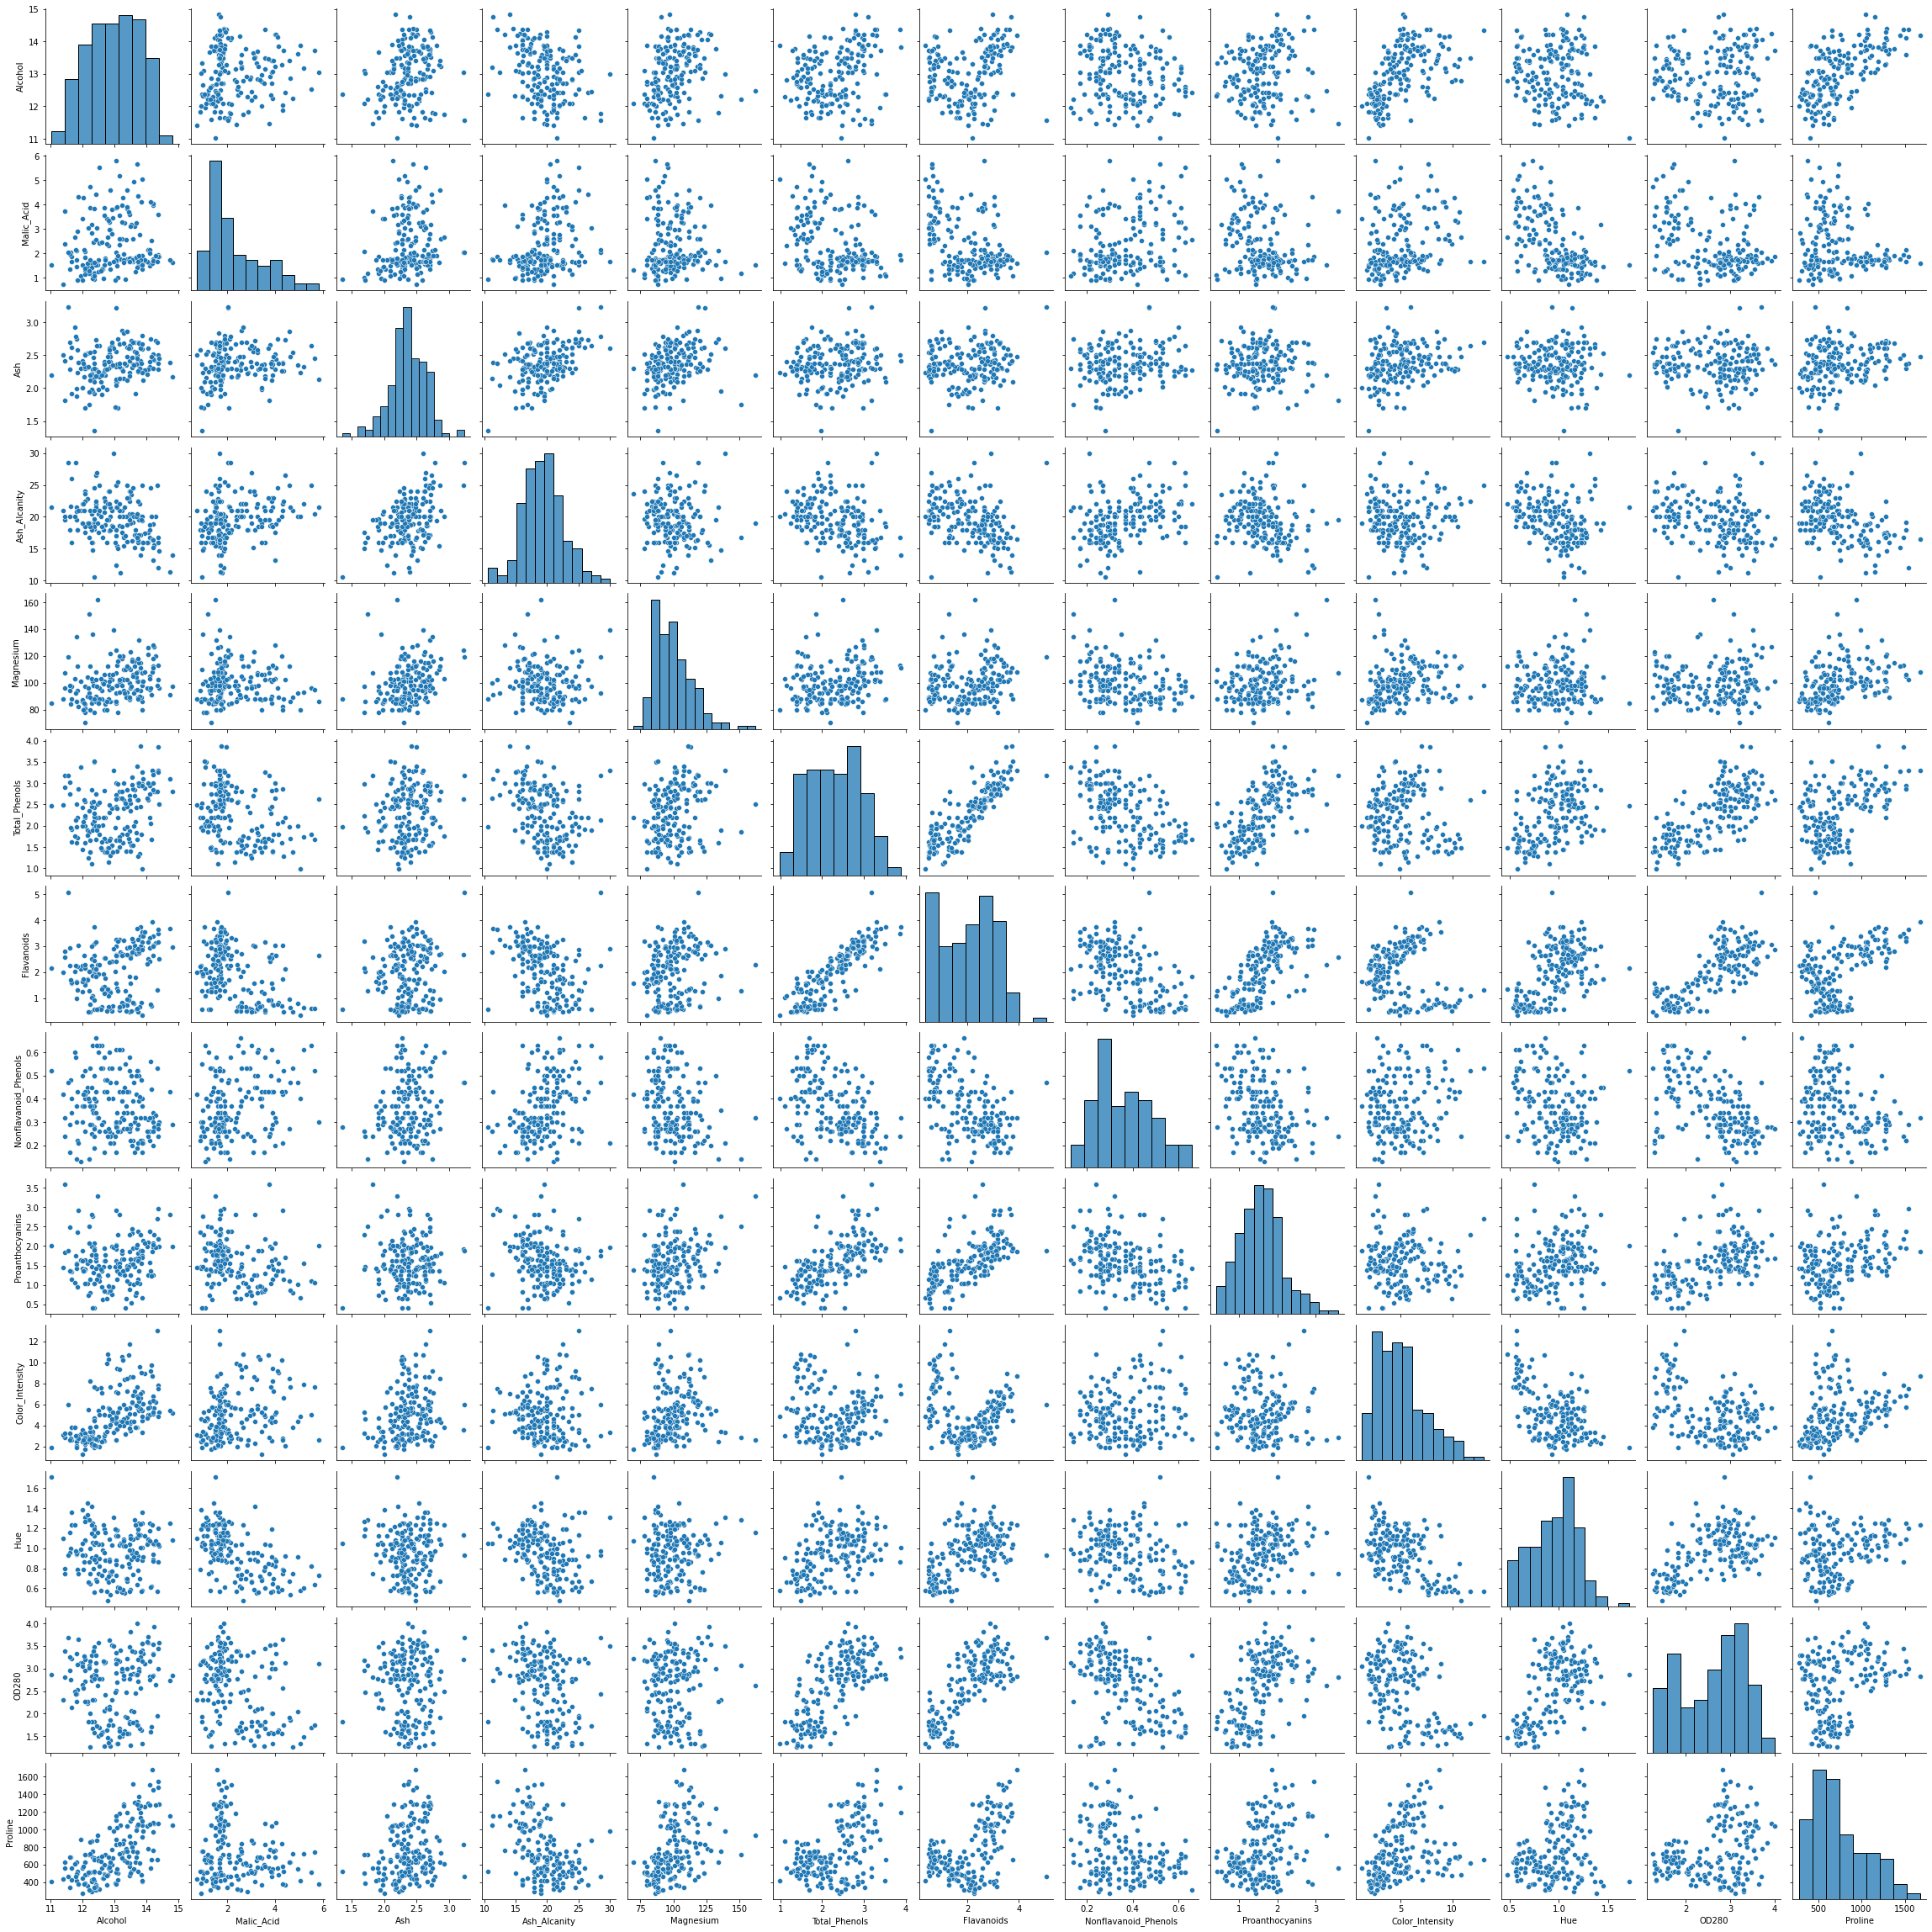

In [9]:
sns.pairplot(wines)
plt.show()

**KMeans Clustering and Feature Reduction Using PCA**

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
ss = StandardScaler()

scaled_df = pd.DataFrame(ss.fit_transform(wines), columns = columns)

<Figure size 432x288 with 0 Axes>

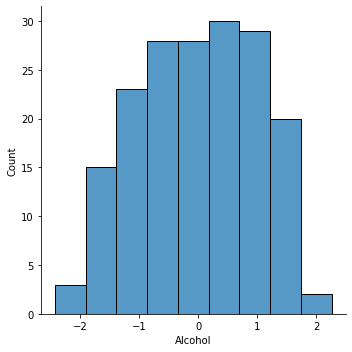

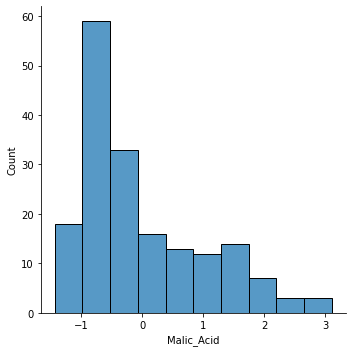

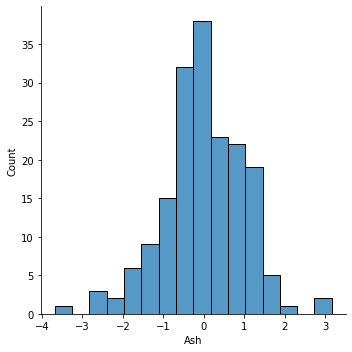

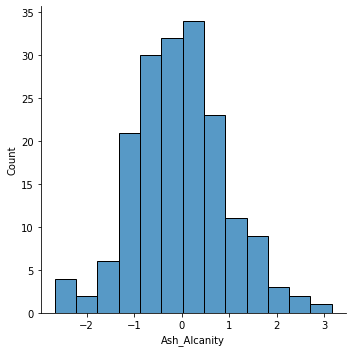

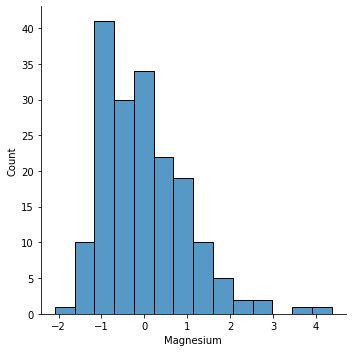

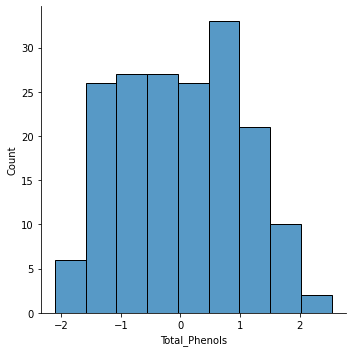

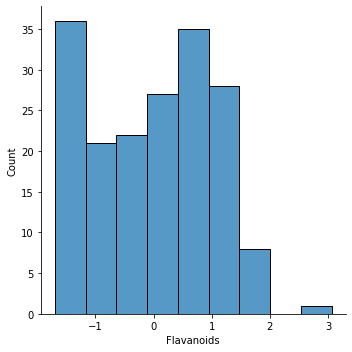

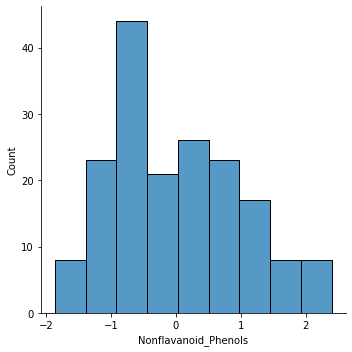

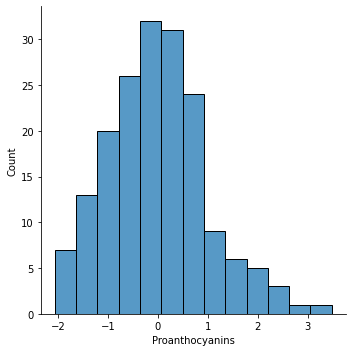

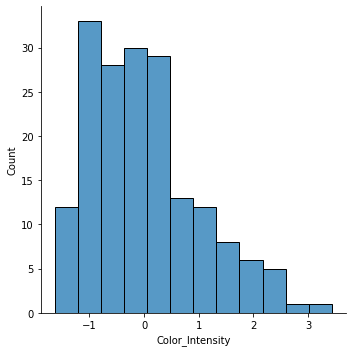

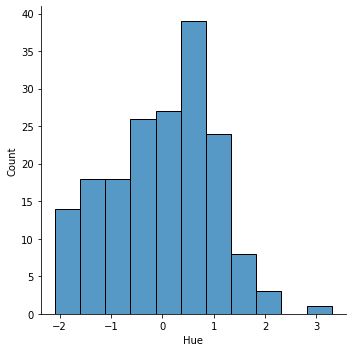

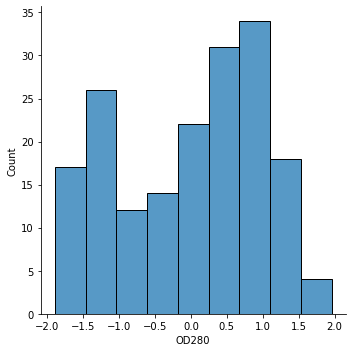

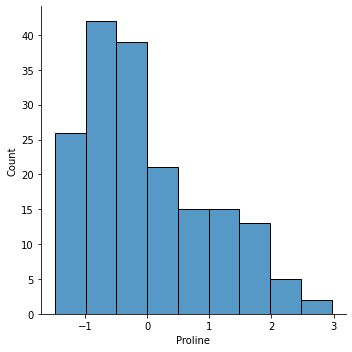

In [12]:
for i, col in enumerate(columns):
    plt.figure(i)
    sns.displot(scaled_df[col])

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

principal_df = pd.DataFrame(data = X_pca, columns = ['PCA1', 'PCA2'])

In [14]:
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

In [15]:
# Train and make predictions
kmeansclusters_pca = kmeans.fit_predict(principal_df)

In [16]:
# Cluster centers
centroids = kmeans.cluster_centers_

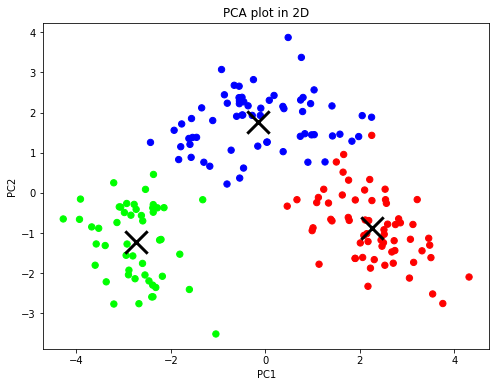

In [17]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=kmeansclusters_pca, cmap="brg", s=40)
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [18]:
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_df)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=kmeansclusters_pca, size=0.1*np.ones(len(scaled_df)), opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

In [19]:
kmeansclusters_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [20]:
df = wines

In [21]:
df['KMeans_Cluster_PCA'] = kmeansclusters_pca.tolist()

In [22]:
df.sample(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
106    12.25        1.73  2.12          19.0         80           1.65   
143    13.62        4.95  2.35          20.0         92           2.00   
92     12.69        1.53  2.26          20.7         80           1.38   
174    13.40        3.91  2.48          23.0        102           1.80   
162    12.85        3.27  2.58          22.0        106           1.65   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
106        2.03                  0.37             1.63             3.40  1.00   
143        0.80                  0.47             1.02             4.40  0.91   
92         1.46                  0.58             1.62             3.05  0.96   
174        0.75                  0.43             1.41             7.30  0.70   
162        0.60                  0.60             0.96             5.58  0.87   

     OD280  Proline  KMeans_Cluster_PCA  
106   3.17      510                   0  
143   2.05      550                   2  
92    2.06      495                   0  
174   1.56      750                   2  
162   2.11      570                   2

**KMeans Clustering and Feature Reduction Using UMAP**

In [23]:
import umap.umap_ as umap

In [24]:
um = umap.UMAP()
x_fit = um.fit(scaled_df)
x_umap = um.transform(scaled_df)

In [25]:
umap_df = pd.DataFrame(data = x_umap, columns = ['umap comp. 1', 'umap comp. 2'])

In [26]:
umap_df.shape

(178, 2)

In [27]:
umap_df.head()

umap comp. 1  umap comp. 2
0     10.814951      9.059958
1      9.844379      8.287432
2     10.492686      7.315001
3     11.402284      7.930831
4      9.208191      7.003255

In [28]:
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
kmeansclusters_umap = kmeans.fit_predict(x_umap)

# Cluster centers
centroids = kmeans.cluster_centers_

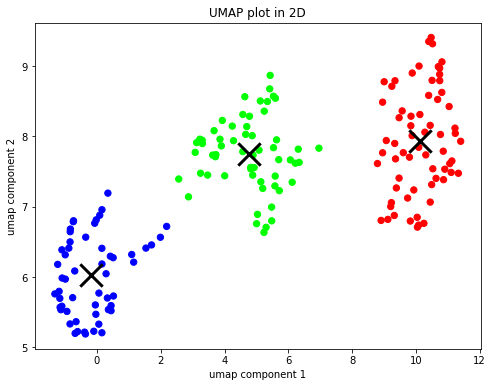

In [29]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=kmeansclusters_umap, cmap="brg", s=40)

# Centroids
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')
plt.show()

In [30]:
# PCA
um = umap.UMAP(n_components=3)
components_umap = um.fit_transform(scaled_df)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=kmeansclusters_umap, size=0.1*np.ones(len(scaled_df)), opacity = 1,
    title='UMAP plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

In [31]:
kmeansclusters_umap

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [32]:
df['KMeans_Cluster_UMAP'] = kmeansclusters_umap.tolist()

In [33]:
df.sample(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
30     13.73        1.50  2.70          22.5        101           3.00   
167    12.82        3.37  2.30          19.5         88           1.48   
63     12.37        1.13  2.16          19.0         87           3.50   
13     14.75        1.73  2.39          11.4         91           3.10   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
30         3.25                  0.29             2.38             5.70  1.19   
167        0.66                  0.40             0.97            10.26  0.72   
63         3.10                  0.19             1.87             4.45  1.22   
13         3.69                  0.43             2.81             5.40  1.25   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  KMeans_Cluster_PCA  KMeans_Cluster_UMAP  
30    2.71     1285                   1                    1  
167   1.75      685                   2                    0  
63    2.87      420                   0                    2  
13    2.73     1150                   1                    1  
177   1.60      560                   2                    0

**KMeans Clustering and Feature Reduction Using t-SNE**

In [34]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(scaled_df)

In [36]:
tsne_df = pd.DataFrame(data = x_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

In [37]:
tsne_df.shape

(178, 2)

In [38]:
tsne_df.head()

tsne comp. 1  tsne comp. 2
0      3.507671    -10.853365
1      2.917411     -7.133722
2      7.697696     -7.788281
3      6.175278    -10.926777
4      6.795211     -3.410044

In [39]:
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
kmeansclusters_tsne = kmeans.fit_predict(x_tsne)

# Cluster centers
centroids = kmeans.cluster_centers_

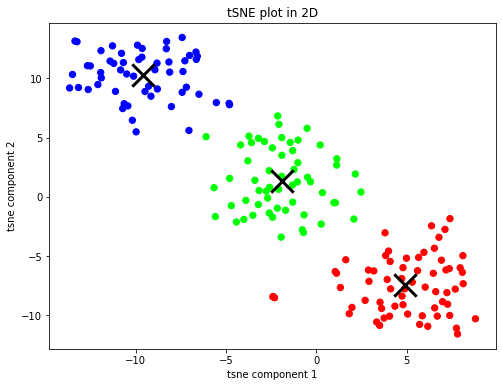

In [40]:
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=kmeansclusters_tsne, cmap="brg", s=40)

# Centroids
plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('tSNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')
plt.show()

In [41]:
# tSNE
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(scaled_df)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=kmeansclusters_tsne, size=0.1*np.ones(len(scaled_df)), opacity = 1,
    title='tSNE plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()

In [42]:
kmeansclusters_tsne

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [43]:
df['KMeans_Cluster_tSNE'] = kmeansclusters_tsne.tolist()

In [44]:
df.sample(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
25     13.05        2.05  3.22          25.0        124           2.63   
150    13.50        3.12  2.62          24.0        123           1.40   
28     13.87        1.90  2.80          19.4        107           2.95   
166    13.45        3.70  2.60          23.0        111           1.70   
157    12.45        3.03  2.64          27.0         97           1.90   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
25         2.68                  0.47             1.92             3.58  1.13   
150        1.57                  0.22             1.25             8.60  0.59   
28         2.97                  0.37             1.76             4.50  1.25   
166        0.92                  0.43             1.46            10.68  0.85   
157        0.58                  0.63             1.14             7.50  0.67   

     OD280  Proline  KMeans_Cluster_PCA  KMeans_Cluster_UMAP  \
25    3.20      830                   1                    1   
150   1.30      500                   2                    0   
28    3.40      915                   1                    1   
166   1.56      695                   2                    0   
157   1.73      880                   2                    0   

     KMeans_Cluster_tSNE  
25                     1  
150                    0  
28                     1  
166                    0  
157                    0

In [45]:
kmeansclusters_tsne

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [46]:
kmeansclusters_umap

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [47]:
kmeansclusters_pca

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [50]:
df['KMeans_Cluster_PCA'] = df.KMeans_Cluster_PCA.replace({0: 2, 2: 0})

In [54]:
df.sample(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
42     13.88        1.89  2.59          15.0        101           3.25   
169    13.40        4.60  2.86          25.0        112           1.98   
126    12.43        1.53  2.29          21.5         86           2.74   
164    13.78        2.76  2.30          22.0         90           1.35   
73     12.99        1.67  2.60          30.0        139           3.30   
146    13.88        5.04  2.23          20.0         80           0.98   
98     12.37        1.07  2.10          18.5         88           3.52   
22     13.71        1.86  2.36          16.6        101           2.61   
93     12.29        2.83  2.22          18.0         88           2.45   
6      14.39        1.87  2.45          14.6         96           2.50   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
42         3.56                  0.17             1.70             5.43  0.88   
169        0.96                  0.27             1.11             8.50  0.67   
126        3.15                  0.39             1.77             3.94  0.69   
164        0.68                  0.41             1.03             9.58  0.70   
73         2.89                  0.21             1.96             3.35  1.31   
146        0.34                  0.40             0.68             4.90  0.58   
98         3.75                  0.24             1.95             4.50  1.04   
22         2.88                  0.27             1.69             3.80  1.11   
93         2.25                  0.25             1.99             2.15  1.15   
6          2.52                  0.30             1.98             5.25  1.02   

     OD280  Proline  KMeans_Cluster_PCA  KMeans_Cluster_UMAP  \
42    3.56     1095                   1                    1   
169   1.92      630                   0                    0   
126   2.84      352                   2                    2   
164   1.68      615                   0                    0   
73    3.50      985                   1                    1   
146   1.33      415                   0                    0   
98    2.77      660                   1                    2   
22    4.00     1035                   1                    1   
93    3.30      290                   2                    2   
6     3.58     1290                   1                    1   

     KMeans_Cluster_tSNE  
42                     1  
169                    0  
126                    2  
164                    0  
73                     1  
146                    0  
98                     2  
22                     1  
93                     2  
6                      1

**Export to CSV**  
  
Exporting to .csv file in order to start using the clusters in Tableau Data Visualization

In [52]:
df.to_csv('wines_with_clusters.csv')

In [56]:
df1 = df[['KMeans_Cluster_PCA', 'KMeans_Cluster_UMAP', 'KMeans_Cluster_tSNE']]

In [62]:
df1.KMeans_Cluster_PCA.value_counts()

2    65
1    64
0    49
Name: KMeans_Cluster_PCA, dtype: int64

In [63]:
df1.KMeans_Cluster_UMAP.value_counts()

1    65
2    59
0    54
Name: KMeans_Cluster_UMAP, dtype: int64

In [64]:
df1.KMeans_Cluster_tSNE.value_counts()

1    65
2    58
0    55
Name: KMeans_Cluster_tSNE, dtype: int64